In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neo
from pathlib import Path


In [2]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp')
files = Path(data_dir).glob("./**/*.smr")
smr_names = [str(f) for f in files]
dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['SMR_file'] = smr_names

for data in df.itertuples():
    s = data.SMR_file

    par = Path(s).parts

    dates.append(par[par.index("468_patch_clamp") + 1][-8:])
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df

,SMR_file,date,slip,cell,trial_string
0,R:\home\firefly_link\468_patch_clamp\20230815\...,20230815,1,3,468_patch_clamp_20230815_slip1_cell3
1,R:\home\firefly_link\468_patch_clamp\20230816\...,20230816,2,5,468_patch_clamp_20230816_slip2_cell5
2,R:\home\firefly_link\468_patch_clamp\20230817\...,20230817,2,1,468_patch_clamp_20230817_slip2_cell1
3,R:\home\firefly_link\468_patch_clamp\20230817\...,20230817,2,2,468_patch_clamp_20230817_slip2_cell2
4,R:\home\firefly_link\468_patch_clamp\20230817\...,20230817,2,3,468_patch_clamp_20230817_slip2_cell3
5,R:\home\firefly_link\468_patch_clamp\20230817\...,20230817,2,4,468_patch_clamp_20230817_slip2_cell4
6,R:\home\firefly_link\468_patch_clamp\20230818\...,20230818,1,1,468_patch_clamp_20230818_slip1_cell1
7,R:\home\firefly_link\468_patch_clamp\20230818\...,20230818,1,2,468_patch_clamp_20230818_slip1_cell2
8,R:\home\firefly_link\468_patch_clamp\20230818\...,20230818,2,1,468_patch_clamp_20230818_slip2_cell1
9,R:\home\firefly_link\468_patch_clamp\20230818\...,20230818,2,2,468_patch_clamp_20230818_slip2_cell2


In [3]:
reader = neo.io.Spike2IO(filename=df.SMR_file[32],try_signal_grouping=False)
# read the block
bl = reader.read(lazy=False)[0]
bl

Block with 1 segments, 8 groups
annotations: {'system_id': 7}
file_origin: 'R:\\home\\firefly_link\\468_patch_clamp\\20230911\\slip2\\cell1\\20230911_slip2_cell1_p1_ephys.smr'
# segments (N=1)
0: Segment with 8 analogsignals, 2 events
   annotations: {'system_id': 7}
   # analogsignals (N=8)
   0: AnalogSignal with 1 channels of length 134119624; units V; datatype float32 
      name: 'cam in'
      annotations: {'channel_id': 0,
        'physical_channel_index': 0,
        'comment': 'cam in'}
      sampling rate: 40322.58064516129 Hz
      time: 0.0 s to 3326.1666752 s
   1: AnalogSignal with 1 channels of length 134119624; units V; datatype float32 
      name: 'led 1 gre'
      annotations: {'channel_id': 1,
        'physical_channel_index': 1,
        'comment': 'led 1'}
      sampling rate: 40322.58064516129 Hz
      time: 3.1e-06 s to 3326.1666783 s
   2: AnalogSignal with 1 channels of length 134119624; units V; datatype float32 
      name: 'led 2 blu'
      annotations: {'cha

In [5]:
asig_t = bl.segments[0].analogsignals[0]
# Extract sample times
#times = asig_t.times.rescale('s').magnitude
# Determine channel name, without leading b' 
asig = asig_t
ch = asig.name
V_cc = {}
I_cc = {}
# Extract sampling frequency
fs = float(asig.sampling_rate)
# Assign sampling times, sampling frequency and data to correct dictionary
for asig in bl.segments[0].analogsignals:
    ch = asig.name
    times = asig.times.rescale('s').magnitude
    if ch == 'V_cc':
        
        V_cc['times'] = times
        V_cc['signal'] = np.array(asig)
        V_cc['fs'] = fs
    elif ch == 'I_cc':
        
        I_cc['times'] = times
        I_cc['signal'] = np.array(asig)
        I_cc['fs'] = fs

NameError: name 'bl' is not defined

In [4]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (times.shape[0]*0.0000005,8))
axs[0].plot(times[np.where(times<2500)], V_cc['signal'][np.where(times<2500)])
axs[0].set_ylim(-120,50)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(0,2200)
axs[1].plot(times[np.where(times<2500)], I_cc['signal'][np.where(times<2500)])
axs[1].set_ylabel('I(pA)')
axs[1].set_xlabel('Time')


fig.tight_layout()
plt.show()

NameError: name 'times' is not defined

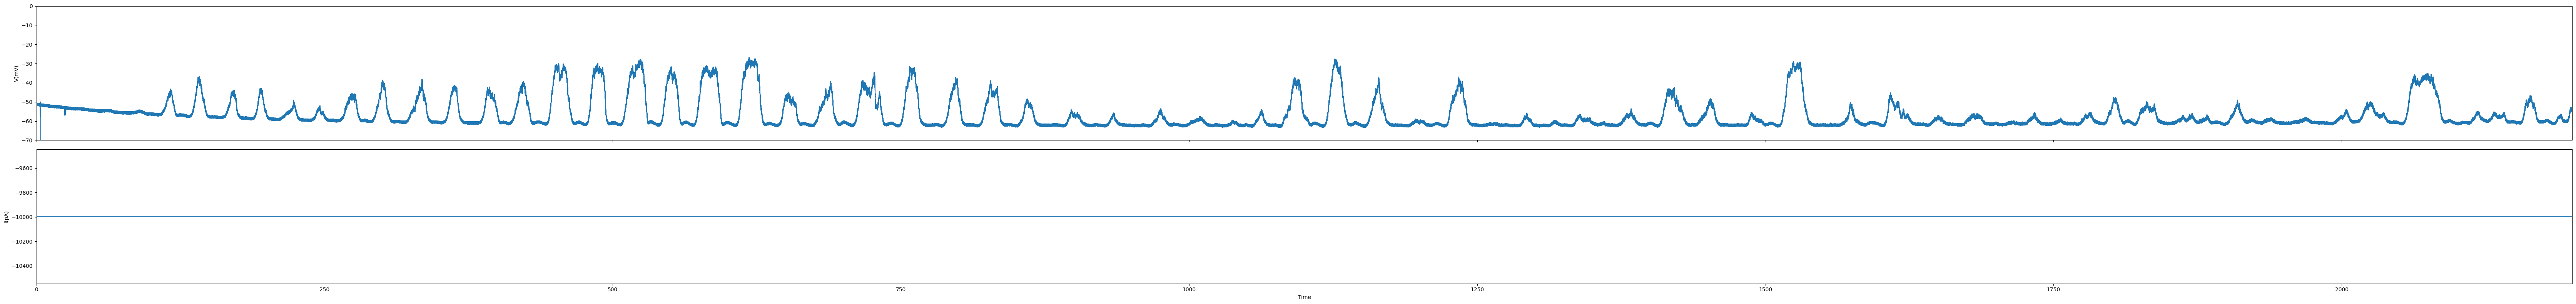

In [20]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (times.shape[0]*0.0000005,8))
axs[0].plot(times[np.where(times<2200)], V_cc['signal'][np.where(times<2200)])
axs[0].set_ylim(-70,0)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(0,2200)
axs[1].plot(times[np.where(times<2200)], I_cc['signal'][np.where(times<2200)])
axs[1].set_ylabel('I(pA)')
axs[1].set_xlabel('Time')


fig.tight_layout()
plt.show()

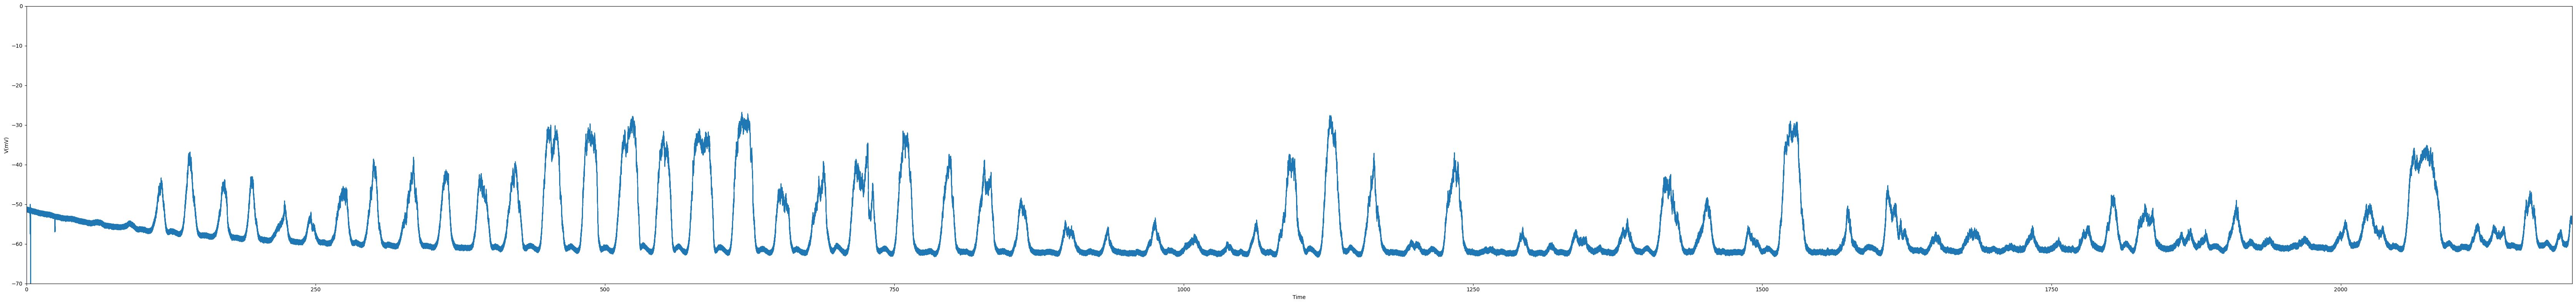

In [5]:
fig, axs = plt.subplots(1, 1, sharex=True, figsize = (times.shape[0]*0.0000005,8))
axs.plot(times[np.where(times<2200)], V_cc['signal'][np.where(times<2200)])
axs.set_ylim(-70,0)
axs.set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs.set_xlim(0,2200)
#axs[1].plot(times[np.where(times<2200)], I_cc['signal'][np.where(times<2200)])
#axs[1].set_ylabel('I(pA)')
axs.set_xlabel('Time')


fig.tight_layout()
plt.show()

In [3]:
reader = neo.io.Spike2IO(filename=df.SMR_file[33],try_signal_grouping=False)
# read the block
bl = reader.read(lazy=False)[0]
bl

Block with 1 segments, 8 groups
annotations: {'system_id': 7}
file_origin: 'R:\\home\\firefly_link\\468_patch_clamp\\20230911\\slip2\\cell1\\20230911_slip2_cell1_p2_ephys.smr'
# segments (N=1)
0: Segment with 8 analogsignals, 2 events
   annotations: {'system_id': 7}
   # analogsignals (N=8)
   0: AnalogSignal with 1 channels of length 134120353; units V; datatype float32 
      name: 'cam in'
      annotations: {'channel_id': 0,
        'physical_channel_index': 0,
        'comment': 'cam in'}
      sampling rate: 40322.58064516129 Hz
      time: 0.0 s to 3326.1847544 s
   1: AnalogSignal with 1 channels of length 134120353; units V; datatype float32 
      name: 'led 1 gre'
      annotations: {'channel_id': 1,
        'physical_channel_index': 1,
        'comment': 'led 1'}
      sampling rate: 40322.58064516129 Hz
      time: 3.1e-06 s to 3326.1847575 s
   2: AnalogSignal with 1 channels of length 134120353; units V; datatype float32 
      name: 'led 2 blu'
      annotations: {'cha

In [4]:
asig_t = bl.segments[0].analogsignals[0]
# Extract sample times
#times = asig_t.times.rescale('s').magnitude
# Determine channel name, without leading b' 
asig = asig_t
ch = asig.name
V_cc = {}
I_cc = {}
# Extract sampling frequency
fs = float(asig.sampling_rate)
# Assign sampling times, sampling frequency and data to correct dictionary
for asig in bl.segments[0].analogsignals:
    ch = asig.name
    times = asig.times.rescale('s').magnitude
    if ch == 'V_cc':
        
        V_cc['times'] = times
        V_cc['signal'] = np.array(asig)
        V_cc['fs'] = fs
    elif ch == 'I_cc':
        
        I_cc['times'] = times
        I_cc['signal'] = np.array(asig)
        I_cc['fs'] = fs

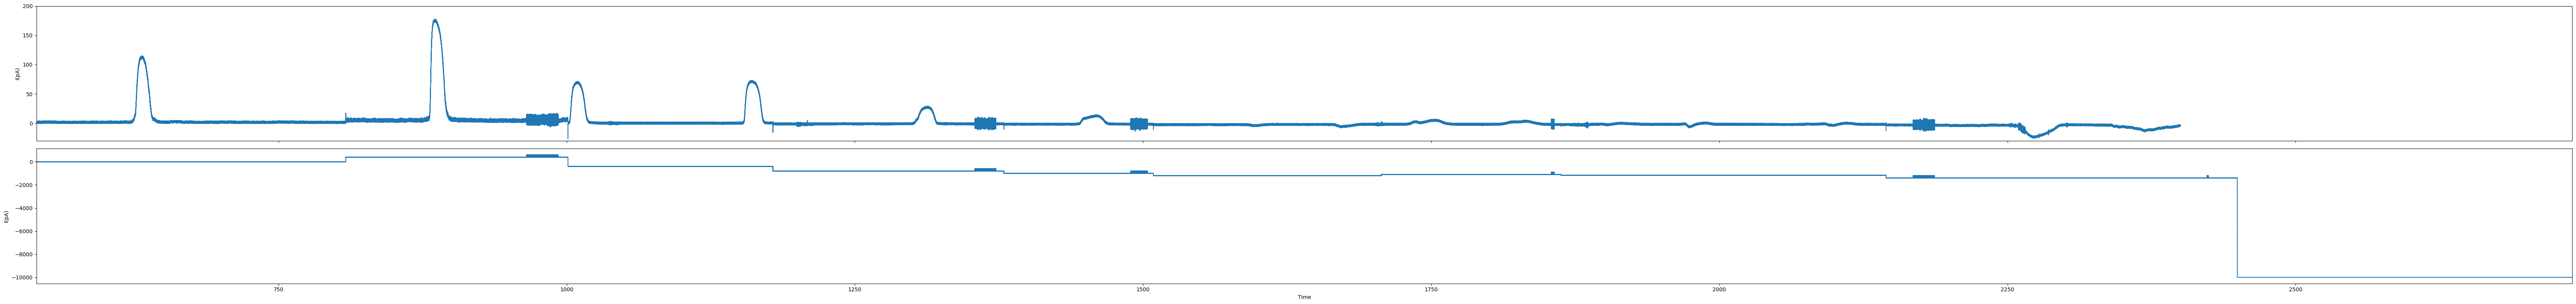

In [34]:
#V_cc['signal'] = V_cc['signal']/0.5
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (times.shape[0]*0.0000005,8))
#axs[0].plot(times[np.where(540<times)], V_cc['signal'][np.where(540<times)])
#V_cc['signal'] = V_cc['signal']/0.5
axs[0].plot(times[(times>540) & (times<2400)], V_cc['signal'][np.where((times>540) & (times<2400))])
axs[0].set_ylim(-30,200)
axs[0].set_ylabel('I(pA)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(540,2740)
axs[1].plot(times[np.where(540<times)], I_cc['signal'][np.where(540<times)])
axs[1].set_ylabel('I(pA)')
axs[1].set_xlabel('Time')


fig.tight_layout()
plt.show()

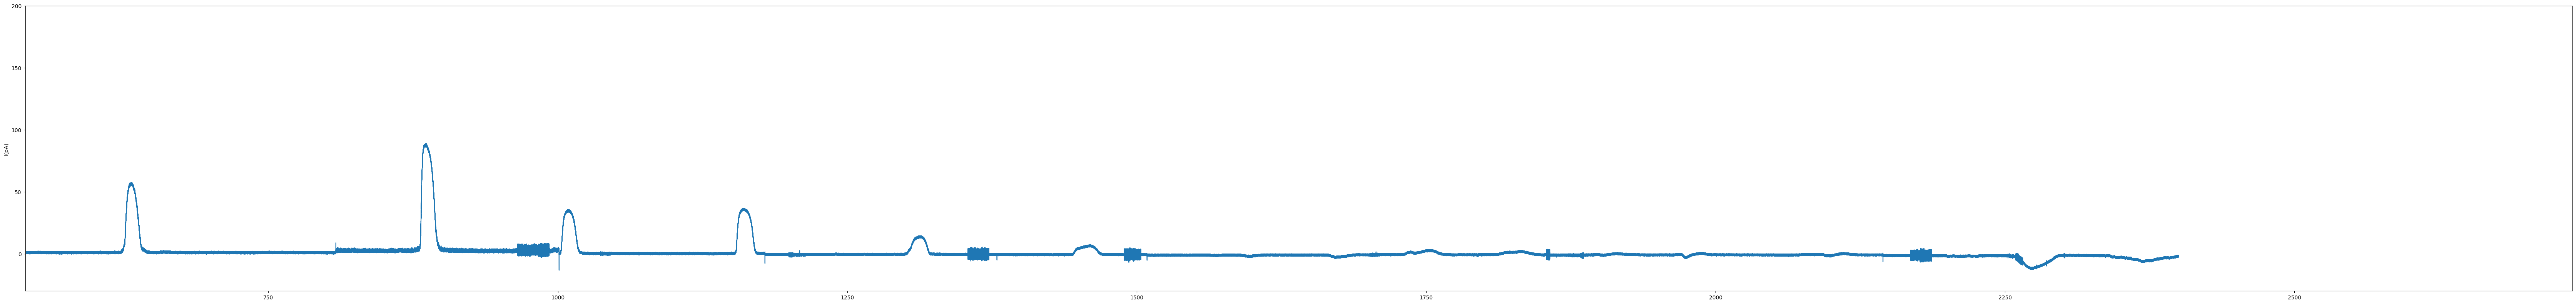

In [5]:
#V_cc['signal'] = V_cc['signal']/0.5
fig, axs = plt.subplots(1, 1, sharex=True, figsize = (times.shape[0]*0.0000005,8))
#axs[0].plot(times[np.where(540<times)], V_cc['signal'][np.where(540<times)])
#V_cc['signal'] = V_cc['signal']/0.5
axs.plot(times[(times>540) & (times<2400)], V_cc['signal'][np.where((times>540) & (times<2400))])
axs.set_ylim(-30,200)
axs.set_ylabel('I(pA)')
#axs[0].set_xlim(times.min(), times.max())
axs.set_xlim(540,2740)
#axs[1].plot(times[np.where(540<times)], I_cc['signal'][np.where(540<times)])
#axs[1].set_ylabel('I(pA)')
#axs[1].set_xlabel('Time')


fig.tight_layout()
plt.show()

Text(0, 0.5, 'Peak Current (pA)')

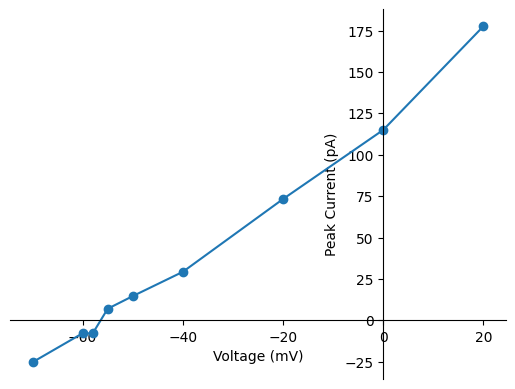

In [23]:
#V_cc['signal'] = V_cc['signal']/0.5
#for ploting peak I-V plot
V_0 = V_cc['signal'][np.where((times>540) & (times<750))].max()
V_20 = V_cc['signal'][np.where((times>750) & (times<1000))].max()
V_20_neg = V_cc['signal'][np.where((times>1000) & (times<1200))].max()
V_40_neg = V_cc['signal'][np.where((times>1200) & (times<1340))].max()
V_50_neg = V_cc['signal'][np.where((times>1400) & (times<1480))].max()
V_60_neg = V_cc['signal'][np.where((times>1520) & (times<1690))].min()
V_55_neg = V_cc['signal'][np.where((times>1720) & (times<1850))].max()
V_58_neg = V_cc['signal'][np.where((times>1900) & (times<2140))].min()
V_70_neg = V_cc['signal'][np.where((times>2200) & (times<2420))].min()
I_peak = [V_70_neg, V_60_neg, V_58_neg, V_55_neg,V_50_neg, V_40_neg, V_20_neg, V_0, V_20]
I_peak

import seaborn
V = [-70,-60,-58,-55,-50,-40,-20,0,20]
fig, ax = plt.subplots()
ax.plot(V,I_peak,'-o')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Voltage (mV)')
plt.ylabel('Peak Current (pA)')

Text(0, 0.5, 'Baseline Current (pA)')

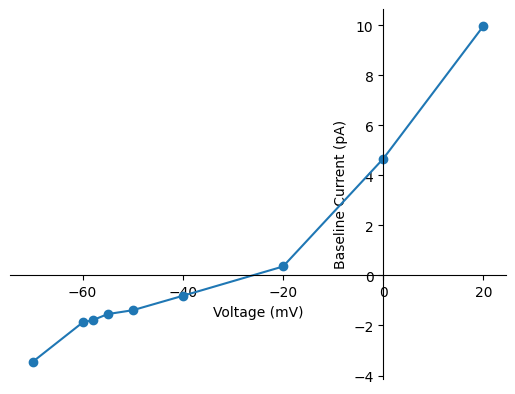

In [24]:
#V_cc['signal'] = V_cc['signal']/0.5
#for ploting baseline I-V plot
V_0 = V_cc['signal'][np.where((times>540) & (times<610))].max()
V_20 = V_cc['signal'][np.where((times>820) & (times<860))].max()
V_20_neg = V_cc['signal'][np.where((times>1040) & (times<1140))].mean()
V_40_neg = V_cc['signal'][np.where((times>1220) & (times<1280))].mean()
V_50_neg = V_cc['signal'][np.where((times>1390) & (times<1430))].mean()
V_60_neg = V_cc['signal'][np.where((times>1620) & (times<1660))].mean()
V_55_neg = V_cc['signal'][np.where((times>1770) & (times<1810))].mean()
V_58_neg = V_cc['signal'][np.where((times>2010) & (times<2070))].mean()
V_70_neg = V_cc['signal'][np.where((times>2200) & (times<2250))].mean()
I_peak = [V_70_neg, V_60_neg, V_58_neg, V_55_neg,V_50_neg, V_40_neg, V_20_neg, V_0, V_20]
I_peak

import seaborn
V = [-70,-60,-58,-55,-50,-40,-20,0,20]
fig, ax = plt.subplots()
ax.plot(V,I_peak,'-o')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Voltage (mV)')
plt.ylabel('Baseline Current (pA)')

tcs = []
#tcs = np.array(tcs)
for i in [3,9]:
    reader = neo.io.Spike2IO(filename=df.SMR_file[i],try_signal_grouping=False)
    # read the block
    bl = reader.read(lazy=False)[0]
    bl

    #asig_t = bl.segments[0].analogsignals[0]
    # Extract sample times
    #times = asig_t.times.rescale('s').magnitude
    # Determine channel name, without leading b' 
    #ch = asig.name
    V_cc = {}
    I_cc = {}
    # Extract sampling frequency
    #fs = float(asig.sampling_rate)
    # Assign sampling times, sampling frequency and data to correct dictionary
    for asig in bl.segments[0].analogsignals:
        ch = asig.name
        times = asig.times.rescale('s').magnitude
        fs = float(asig.sampling_rate)
        if ch == 'V_cc':
            V_cc['times'] = times
            V_cc['signal'] = np.array(asig)
            V_cc['fs'] = fs
            #tcs = np.vstack((tcs,V_cc['signal'][:times.shape[0]]))
            #tcs.append(list(V_cc['signal'][:times.shape[0]].flatten()))
        elif ch == 'I_cc':
            I_cc['times'] = times
            I_cc['signal'] = np.array(asig)
            I_cc['fs'] = fs
            #tcs = np.vstack((tcs,I_cc['signal'][:times.shape[0]]))
            #tcs.append(list(I_cc['signal'][:times.shape[0]].flatten()))
        
#tcs           

    fig, axs = plt.subplots(2, 1, sharex=True, figsize = (40,10))
    axs[0].plot(times, V_cc['signal'][:times.shape[0]])
    axs[0].set_ylim(-70,0)
    axs[0].set_ylabel('V(mV)')
    axs[0].set_xlim(0,3350)
    axs[1].plot(times, I_cc['signal'])
    axs[1].set_ylabel('I(pA)')
    axs[1].set_xlabel('Time')


    fig.tight_layout()
    plt.show()